w 0 = -11.435458566766423
w 1 = 11.637771143736646
w 2 = 10.5324473178091
The minimum value of cost function is: 0.0617270377320522
The sigmoid function is commonly used in classification problems because it maps any input value to a probability between 0 and 1. This property of the sigmoid function makes it particularly useful in binary classification problems, where the goal is to predict whether a given input belongs to one of two possible classes


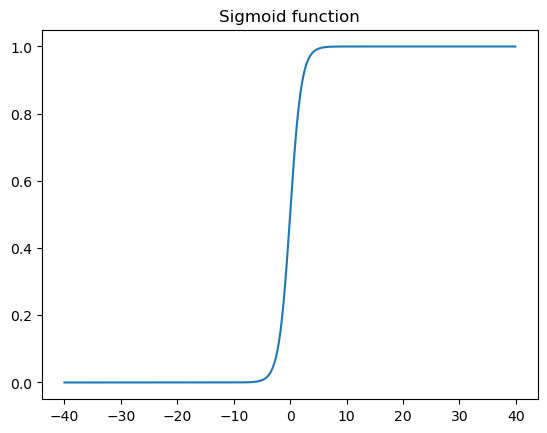

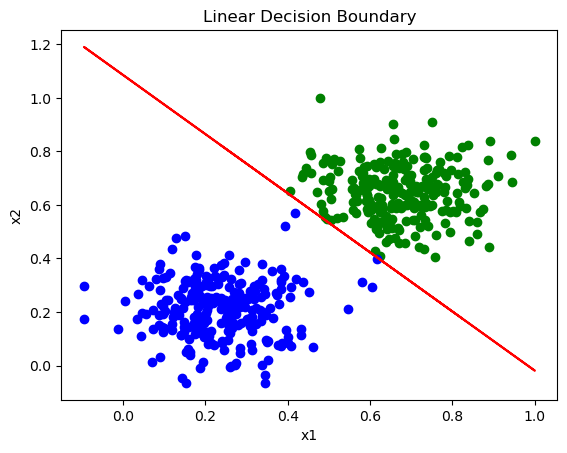

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def sigmoid(z):
    return 1/(1+np.exp(-z))

df=pd.read_csv('Logistic_regression_ls.csv')
totalcolumns=['x1','x2']
input = df.loc[:, totalcolumns]
output_train= df.loc[:,['label']]

input_train=[]
input_train.append((df['x1']/max(df['x1'])).tolist())
input_train.append((df['x2']/max(df['x2'])).tolist())
# print(input_train)

output_train=output_train['label'].tolist()
# print(output_train)


def W(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))]
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
   
    # print(len(sumlist))
    # print(*sumlist)
    return sumlist

# W(2,0.1,0.1)

def J(*arg):
    wlist=[*arg]
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
        # print(sumlist)
    sumlist=np.array(sumlist)
    H=sigmoid(sumlist)
    # print(H)

    Jlist=[-output_train[i]*math.log(H[i])-(1-output_train[i])*math.log(1-H[i]) for i in range(len(output_train))]
    # print(Jlist)
    # print(sum(Jlist)/len(Jlist))
    return sum(Jlist)/len(Jlist)

def dir(*arg):
    wlist=[*arg]
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
        # print(sumlist)
    sumlist=np.array(sumlist)
    H=sigmoid(sumlist)


    dir=[]
    dirlist=[(H[i]-output_train[i]) for i in range(len(output_train))]
    dir1=sum(dirlist)/len(dirlist)
    dir.append(dir1)
    for j in input_train:
        dirlist=[(sumlist[i]-output_train[i])*j[i] for i in range(len(output_train))]
        dir1=sum(dirlist)/len(dirlist)
        dir.append(dir1)
    
    # print(dir)
    return np.array(dir)

# J(2,0.1,0.1)
dir(0,0,0.5)



def new_point(X,a):
    R=X-a*dir(X[0],X[1],X[2])
    return R


def J1(x,x0):
    a=x0-x*dir(x0[0],x0[1],x0[2])
    # print(delJ(a))
    # print(x,a)
    return J(x0[0],x0[1],x0[2])

def bracketing(x0):
    a1=0
    b1=6
    # print(a1,b1)
    l=b1-a1

    e1=1e-3

    while abs(l)>=e1 :
                    
        wm=(a1+b1)/2
        x1=a1+l/4
        x2=b1-l/4

        if J1(x1,x0=x0)<J1(wm,x0=x0):
            b1=wm
            wm=x1
                        
                        
        elif J1(x2,x0=x0)<J1(wm,x0=x0):
                        
            a1=wm
            wm=x2
                    
        else:
                        
            a1=x1
            b1=x2        
            l=b1-a1
            range2=(a1,b1)
                                 
    alpha=(a1+b1)/2
        # print(avg)
        # print(f"\n\nalpha = {alpha}")
    return alpha
        
def SGD_variable(w1,e,M):
    k=1
    a=bracketing(x0=w1)
    while np.linalg.norm(dir(w1[0],w1[1],w1[2]))>e and k<M :
        a=bracketing(x0=w1)
        w2=w1-a*dir(w1[0],w1[1],w1[2])
        w1=w2
        k=k+1

    for i in range(len(w1)):
        print ('w',i,'=',w1[i])
    # print('w0:',w1[0],'w1:',w1[1],'w2:',w1[2],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0],'w0:',w1[0])
    # print('x coordinates:',x_coordinates)
    # print('y coordinates:',y_coordinates)
    return w1


w=np.array([-15,0,0])

min= SGD_variable(w1=w,e=1e-7,M=10)
error=J(min[0],min[1],min[2])
print('The minimum value of cost function is:',error)


print('The sigmoid function is commonly used in classification problems because it maps any input value to a probability between 0 and 1. This property of the sigmoid function makes it particularly useful in binary classification problems, where the goal is to predict whether a given input belongs to one of two possible classes')
z=np.arange(-40,40,0.1)
sigmaz=1/(1+np.exp(-z))
plt.plot(z,sigmaz)
plt.title('Sigmoid function')
plt.show()

m = len(input_train[0]) 
x1_1 = []
x1_2 = []
x1_3 = []
x2_1 = []
x2_2 = []
x2_3 = []

x1=np.array(input_train[0])
x2=np.array(input_train[1])

for i in range(m):
    g = min[0] + min[1]*x1[i] + min[2]*x2[i]
    if g > 0:
        x1_2.append(x1[i])
        x2_2.append(x2[i])
    elif g < 0:
        x1_1.append(x1[i])
        x2_1.append(x2[i])
    else:
        x1_3.append(x1[i])
        x2_3.append(x2[i])
plt.scatter(x1_2,x2_2,c = 'g')
plt.scatter(x1_1,x2_1,c = 'b')
plt.scatter(x1_3,x2_3,c = 'b')

# plt.scatter(np.array(input_train[0]),np.array(input_train[1]))
x2_plt=-(min[0]/min[2]+ min[1]/min[2]*np.array(input_train[0]))
plt.plot(np.array(input_train[0]),x2_plt,'red')
plt.title('Linear Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
